In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
cells = {
    'T34UDG', 'T34UEG', 'T34UFG', 'T34VDH', 'T34VDJ', 'T34VDK', 'T34VEH', 'T34VEJ', 'T34VEK', 'T34VFH', 'T34VFJ', 'T34VFK', 
    'T35ULB', 'T35UMB', 'T35UNB', 'T35VLC', 'T35VLD', 'T35VLE', 'T35VMC', 'T35VMD', 'T35VME', 'T35VNC', 'T35VND', 'T35VNE'
}
bands = {
    'B02', 'B03', 'B04', 'B08', 'SCL'
}
parts = [f.split("_")[:3] for f in os.listdir("/home/kristaps/Projs/bulbulis/data_verified/") if ".jp2" in f]
date_coverage = {}
for p in parts:
    date = p[1][:8]
    year = date[:4]
    month = date[4:6]
    if year not in date_coverage:
        date_coverage[year] = {}
    if month not in date_coverage[year]:
        date_coverage[year][month] = {}
    if date not in date_coverage[year][month]:
        date_coverage[year][month][date] = {}
    if p[0] not in date_coverage[year][month][date]:
        date_coverage[year][month][date][p[0]] = set()
    date_coverage[year][month][date][p[0]].add(p[2])


In [3]:
# number of days that have all channels available for all cells

In [12]:
years = sorted(list(date_coverage.keys()))
months = [str(i).zfill(2) for i in range(1, 13)]
for y in years:
    print(f"{y} => {" | ".join([f"{m}:{len({d for d,v in date_coverage[y].get(m, {}).items() if {ki for ki,vi in v.items() if vi == bands} == cells}):2}" for m in months])}")


2017 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0
2018 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0


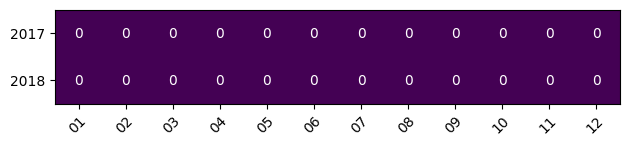

In [13]:
coverage = np.array([[len({d for d,v in date_coverage[y].get(m, {}).items() if {ki for ki,vi in v.items() if vi == bands} == cells}) for m in months] for y in years])

fig, ax = plt.subplots()
im = ax.imshow(coverage)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(months)), labels=months, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(years)), labels=years)

# Loop over data dimensions and create text annotations.
for i in range(len(years)):
    for j in range(len(months)):
        text = ax.text(j, i, coverage[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()


In [5]:
# number of days that have all channels available for at least one cell

In [19]:
years = sorted(list(date_coverage.keys()))
months = [str(i).zfill(2) for i in range(1, 13)]
for y in years:
    print(f"{y} => {" | ".join([f"{m}:{len({d for d,v in date_coverage[y].get(m, {}).items() if len({ki for ki,vi in v.items() if vi == bands}) > 0}):2}" for m in months])}")


2017 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 3 | 11: 0 | 12: 3
2018 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0


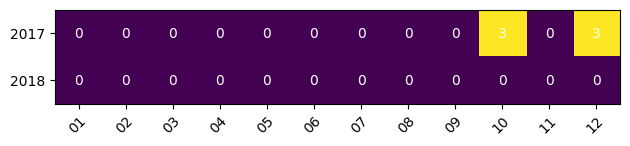

In [20]:
coverage = np.array([[len({d for d,v in date_coverage[y].get(m, {}).items() if len({ki for ki,vi in v.items() if vi == bands}) > 0}) for m in months] for y in years])

fig, ax = plt.subplots()
im = ax.imshow(coverage)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(months)), labels=months, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(years)), labels=years)

# Loop over data dimensions and create text annotations.
for i in range(len(years)):
    for j in range(len(months)):
        text = ax.text(j, i, coverage[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()


In [21]:
# number of days that have at least one channel available for at least one cell

In [22]:
years = sorted(list(date_coverage.keys()))
months = [str(i).zfill(2) for i in range(1, 13)]
for y in years:
    print(f"{y} => {" | ".join([f"{m}:{len({d for d,v in date_coverage[y].get(m, {}).items()}):2}" for m in months])}")


2017 => 01: 0 | 02: 0 | 03: 0 | 04:28 | 05:26 | 06:27 | 07:23 | 08:22 | 09:28 | 10:30 | 11:27 | 12:30
2018 => 01:31 | 02:27 | 03:31 | 04:27 | 05:29 | 06:29 | 07:26 | 08:26 | 09:24 | 10: 0 | 11: 0 | 12: 0


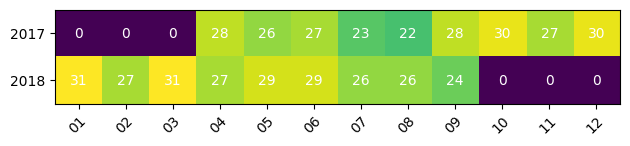

In [23]:
coverage = np.array([[len({d for d,v in date_coverage[y].get(m, {}).items()}) for m in months] for y in years])

fig, ax = plt.subplots()
im = ax.imshow(coverage)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(months)), labels=months, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(years)), labels=years)

# Loop over data dimensions and create text annotations.
for i in range(len(years)):
    for j in range(len(months)):
        text = ax.text(j, i, coverage[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()
